In [1]:
import pandas as pd
df = pd.read_csv("../data/raw/data.csv")
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


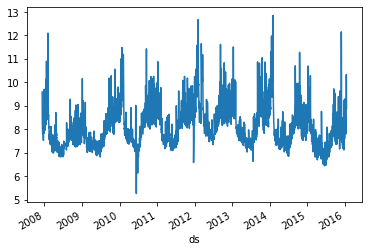

In [2]:
import matplotlib.pyplot as plt
df.ds = pd.to_datetime(df.ds) # properly convert to datetime type
df.index = df.ds # make x-axis naturally appear in the datetime format
df.y.plot()
plt.show()

In [3]:
df.tail()

,ds,y
ds,,
2016-01-16,2016-01-16,7.817223
2016-01-17,2016-01-17,9.273878
2016-01-18,2016-01-18,10.333775
2016-01-19,2016-01-19,9.125871
2016-01-20,2016-01-20,8.891374


In [4]:
from fbprophet import Prophet
# configure the model
model = Prophet(interval_width=0.98, yearly_seasonality=True, changepoint_prior_scale=0.5)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.add_seasonality(name='weekly', period=7, fourier_order=3)

# fit the time-series data
model.fit(df)
        

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
import json
from fbprophet.serialize import model_to_json, model_from_json

with open("../models/serialized_prophet_model.json", 'w') as fout:
    json.dump(model_to_json(model), fout)  # Save model